### Name : Ghosh Kushanava Amitava
### Roll No : 220123083
### Course : MA323
### Branch : MnC

In [114]:
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# linear uniform generator
def linear_congruence_generator(a, b, m, x0, N):
    path = []
    path.append(x0/m)
    for _ in range(N):
        x0 = (a*x0 + b) % m
        path.append(x0/m)
    return np.array(path)

In [116]:
N = [10, 100, 1000, 10000, 100000]
a = 51749
b = 0
m = 244944
x0 = 1

## Q.1

In [117]:
# Cumulative distribution function
# F(x) = 0 if x <= 0
#        1 - (1 - x)^3 if 0 < x < 1
#        1 if x >= 1

def cdf1(x : float) -> float:
    if x <= 0:
        return 0
    elif x < 1:
        return (1 - (1 - x)**3)
    else:
        return 1

In [118]:
# defining inverse of CDF
def inverse_cdf1(u):
    if u <= 0:
        return 0
    elif u >= 1:
        return 1
    else:
        return (1 - (1 - u)**(1/3))

In [119]:
# Empirical CDF
def empirical_cdf(sample, x):
    return np.sum(sample <= x) / len(sample)

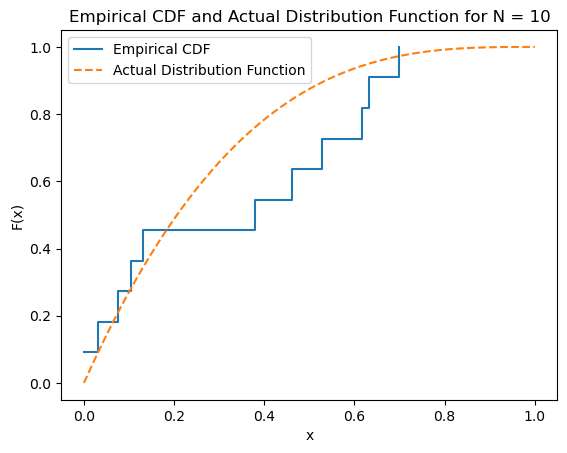

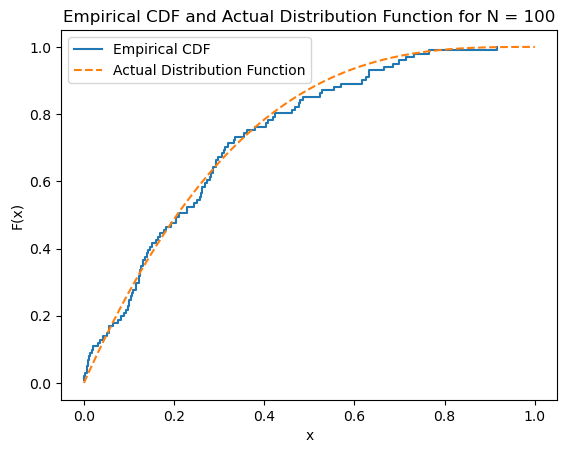

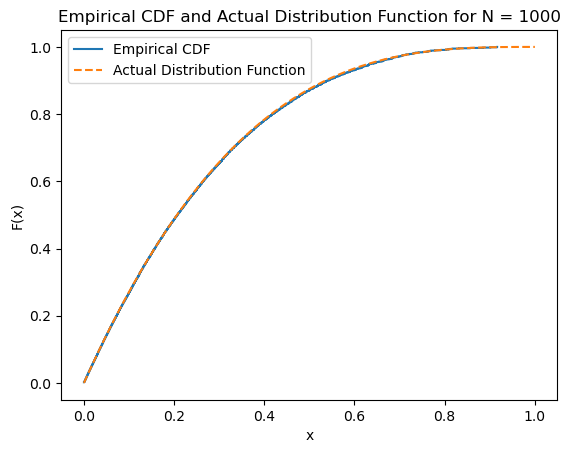

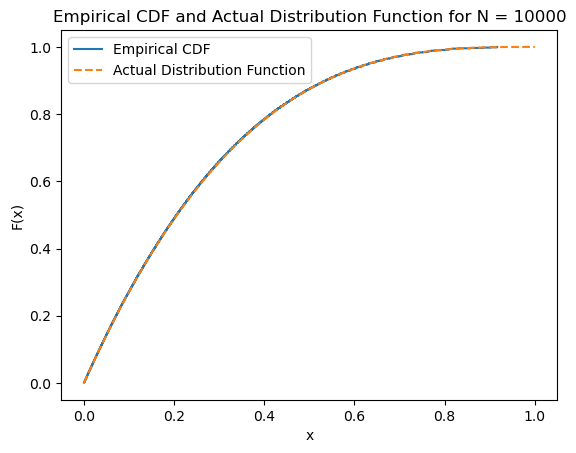

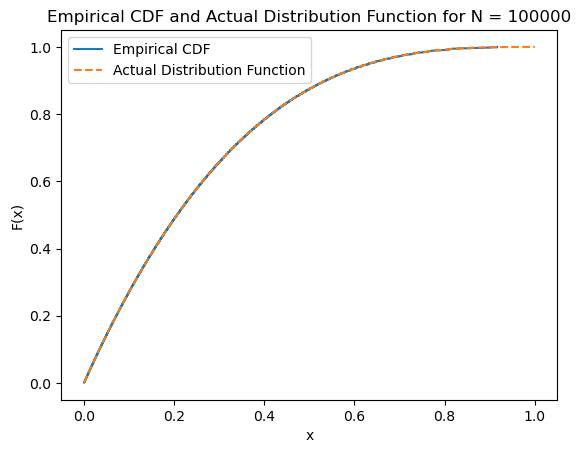

In [120]:
# Convergence Analysis
sample_means1 = []
sample_variances1 = []

for n in N:
    random_numbers = linear_congruence_generator(a, b, m, x0, n)
    sequence = np.array([inverse_cdf1(u) for u in random_numbers])

    sample_means1.append(np.mean(sequence))
    sample_variances1.append(np.var(sequence))

    # Sorting sequence for CDF plotting
    sorted_sequence = np.sort(sequence)

    # Plot empirical CDF
    empirical_cdf_values = [empirical_cdf(sorted_sequence, x) for x in sorted_sequence]
    plt.step(sorted_sequence, empirical_cdf_values, label='Empirical CDF', where='post')

    # Plot actual distribution function
    x_values = np.linspace(0, 1, 1000)
    actual_cdf_values = [cdf1(x) for x in x_values]
    plt.plot(x_values, actual_cdf_values, label='Actual Distribution Function', linestyle='--')

    # Plotting
    plt.title(f'Empirical CDF and Actual Distribution Function for N = {n}')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

In [121]:
# Theoretical mean and variance
def theoretical_mean1():
    return 0.25

def theoretical_variance1():
    return 0.1 - 0.25**2

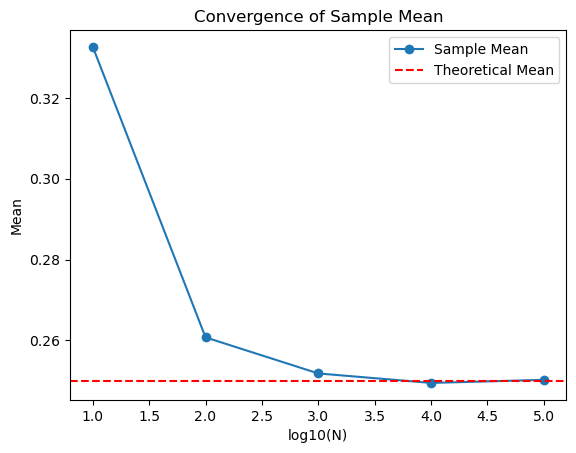

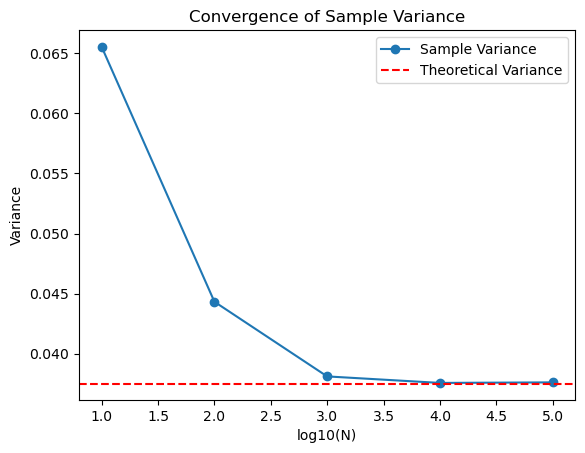

In [122]:
# Plot convergence of mean
plt.figure()
plt.plot(np.log10(N), sample_means1, 'o-', label='Sample Mean')
plt.axhline(theoretical_mean1(), color='r', linestyle='--', label='Theoretical Mean')
plt.title('Convergence of Sample Mean')
plt.xlabel('log10(N)')
plt.ylabel('Mean')
plt.legend()
plt.show()

# Plot convergence of variance
plt.figure()
plt.plot(np.log10(N), sample_variances1, 'o-', label='Sample Variance')
plt.axhline(theoretical_variance1(), color='r', linestyle='--', label='Theoretical Variance')
plt.title('Convergence of Sample Variance')
plt.xlabel('log10(N)')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Q.2

In [123]:
# Cumulative distribution function
def cdf2(x : float) -> float:
    if x <= 0:
        return 0
    elif x <= 1:
        return (1 - np.exp(-x))
    else:
        return (1 - np.exp(-2*x + 1))

In [124]:
# defining inverse of CDF
def inverse_cdf2(u : float) -> float:
    if u <= 0:
        return 0
    elif u >= 1:
        return 0
    elif u <= 1- np.exp(-1):
        return -np.log(1 - u)
    else:
        return (1 - np.log(1 - u)) / 2

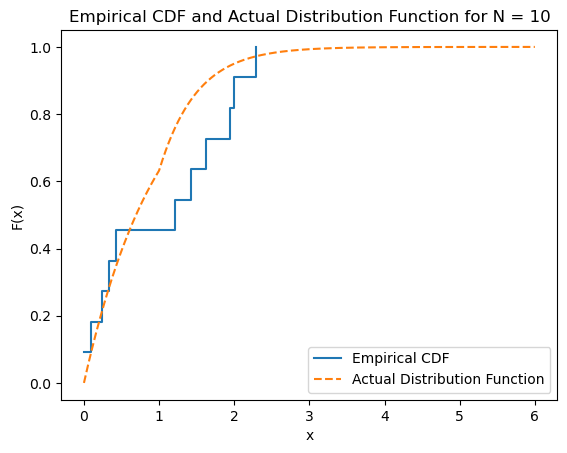

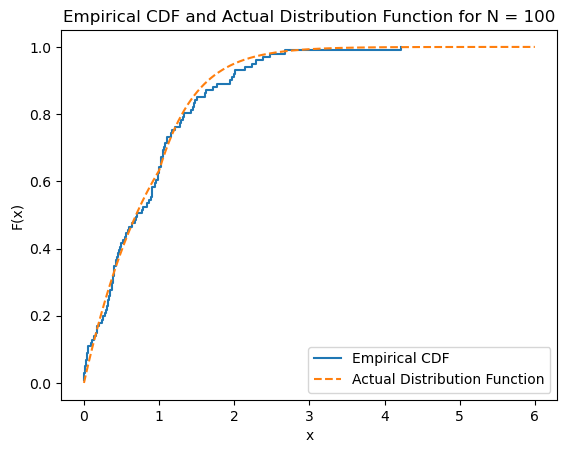

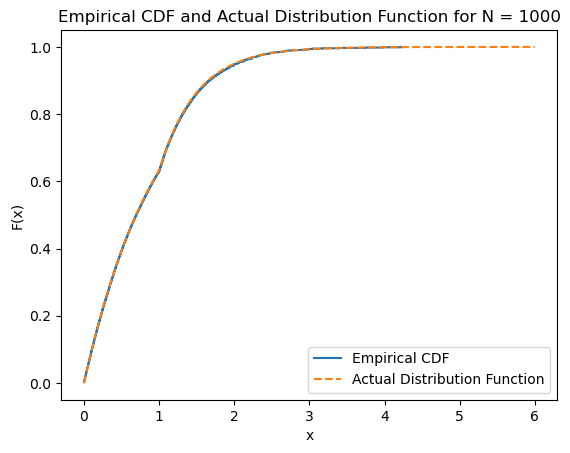

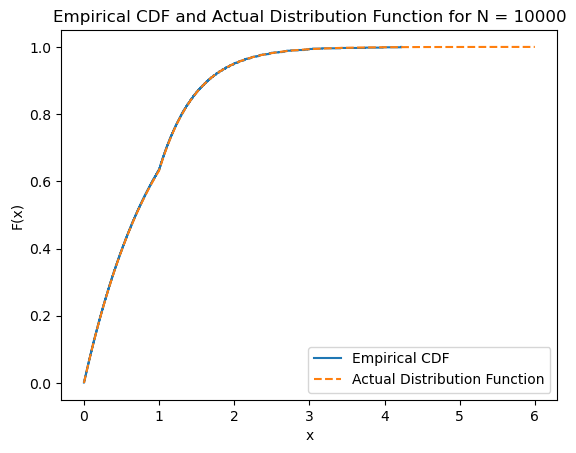

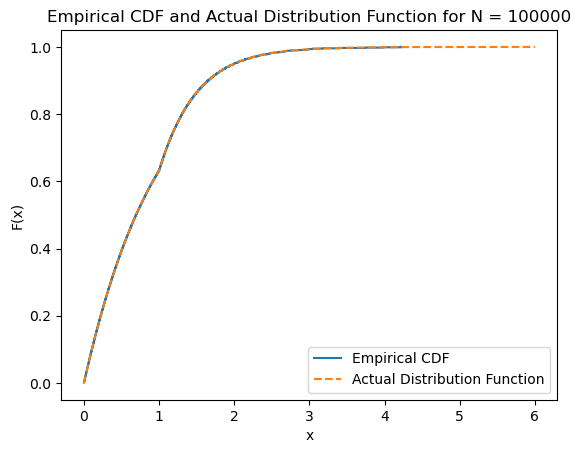

In [125]:
# Convergence Analysis
sample_means2 = []
sample_variances2 = []

for n in N:
    random_numbers = linear_congruence_generator(a, b, m, x0, n)
    sequence = np.array([inverse_cdf2(u) for u in random_numbers])

    sample_means2.append(np.mean(sequence))
    sample_variances2.append(np.var(sequence))

    # Sorting sequence for CDF plotting
    sorted_sequence = np.sort(sequence)

    # Plot empirical CDF
    empirical_cdf_values = [empirical_cdf(sorted_sequence, x) for x in sorted_sequence]
    plt.step(sorted_sequence, empirical_cdf_values, label='Empirical CDF', where='post')

    # Plot actual distribution function
    x_values = np.linspace(0, 6, 1000)
    actual_cdf_values = [cdf2(x) for x in x_values]
    plt.plot(x_values, actual_cdf_values, label='Actual Distribution Function', linestyle='--')

    # Plotting
    plt.title(f'Empirical CDF and Actual Distribution Function for N = {n}')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

In [126]:
# Theoretical mean and variance
def theoretical_mean2():
    return 0.26424 + 0.5518

def theoretical_variance2():
    return 0.1606 + 0.9196 - theoretical_mean2()**2

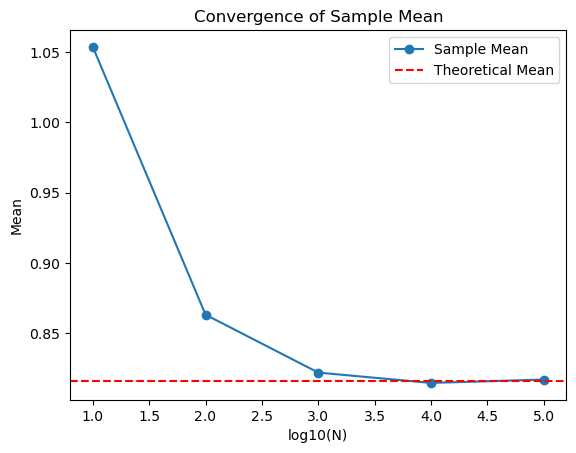

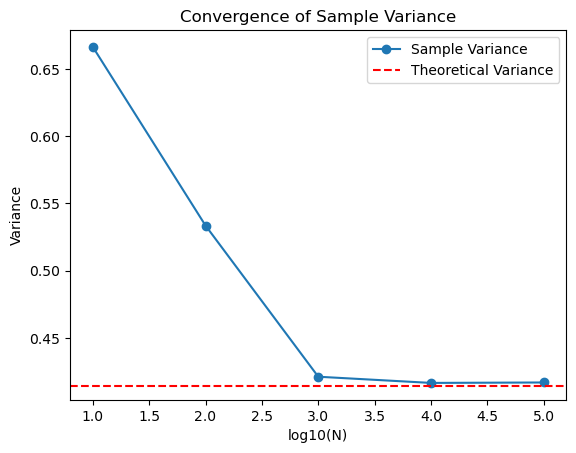

In [127]:
# Plot convergence of mean
plt.figure()
plt.plot(np.log10(N), sample_means2, 'o-', label='Sample Mean')
plt.axhline(theoretical_mean2(), color='r', linestyle='--', label='Theoretical Mean')
plt.title('Convergence of Sample Mean')
plt.xlabel('log10(N)')
plt.ylabel('Mean')
plt.legend()
plt.show()

# Plot convergence of variance
plt.figure()
plt.plot(np.log10(N), sample_variances2, 'o-', label='Sample Variance')
plt.axhline(theoretical_variance2(), color='r', linestyle='--', label='Theoretical Variance')
plt.title('Convergence of Sample Variance')
plt.xlabel('log10(N)')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Q.3

In [128]:
# Generating uniform sequence in [0, 1)
sequence3 = linear_congruence_generator(a, b, m, x0, 100000)

In [129]:
# generate uniform odd numbers from 1 to 9999
uniform_odd = []
for u in sequence3:
    k = int(10000*u)
    if k%2 == 0:
        k+=1
    uniform_odd.append(k)

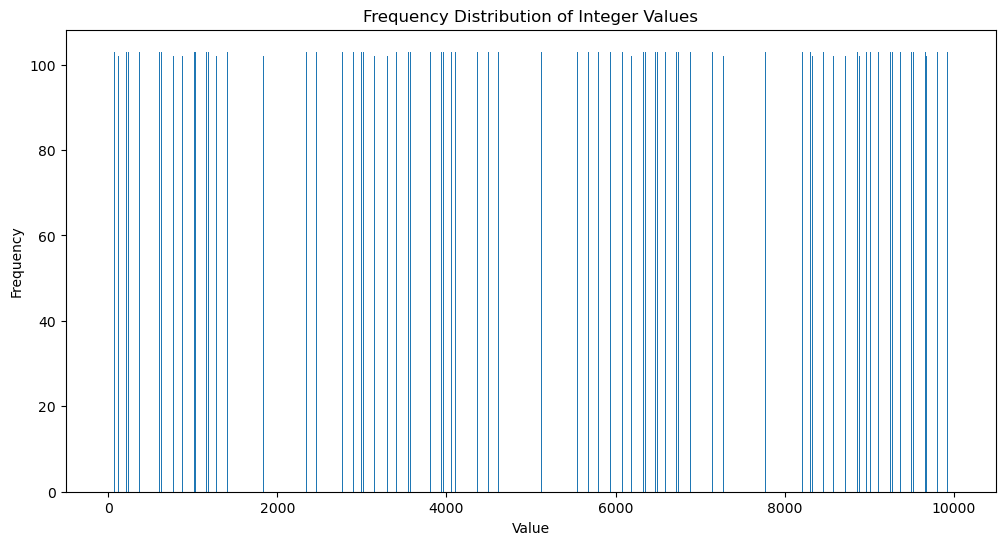

In [130]:
# Count the frequencies of each integer
unique, counts = np.unique(uniform_odd, return_counts=True)
frequency_counter = dict(zip(unique, counts))

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(frequency_counter.keys(), frequency_counter.values(), width=0.8)
plt.title('Frequency Distribution of Integer Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()